In [ ]:
from position_utils import *
import position_utils
import os
import numpy as np
import importlib
importlib.reload(position_utils)

In [155]:
ground_truth_dir = '../Dataset/Selected_dotted/'
human_sol_dir = 'last_drawing_mnist2/'
dl_solutions_dir = '../Search/Final 11/'
constellations_dir = '../Dataset/Selected_Mnist/'

In [156]:
labels = np.load('../Dataset/mnist_constellations_test_sel_11.npz')['labels']

In [157]:
labels = labels.astype(int)

In [158]:
file_list = [96,
 55,
 19,
 77,
 20,
 85,
 71,
 1,
 61,
 45,
 10,
 75,
 94,
 5,
 93,
 86,
 52,
 24,
 9,
 46,
 84,
 98,
 40,
 57,
 33,
 22,
 88,
 69,
 17,
 39,
 97,
 31,
 6,
 43,
 32,
 30,
 21,
 15]

In [159]:
def find_common_dots(dots1,dots2):
    common_dots = []
    for dot1 in dots1:
        for dot2 in dots2:
            (x1,y1),radius = cv2.minEnclosingCircle(dot1)
            (x2,y2),radius = cv2.minEnclosingCircle(dot2)
            if(x1==x2 and y1==y2):
                common_dots.append(dot1)
    return common_dots
                

In [ ]:

IOUs= []
flag = False
images = os.listdir(human_sol_dir)
for stim in images:
    if(stim == '.ipynb_checkpoints'):
        continue
    stimuli = stim.split('_')[1].split('.')[0]
    file = file_list.index(int(stimuli))
    constellation_path = 'test_const_'
    constellation_path = constellations_dir+constellation_path+str(stimuli)+'_'+str(int(labels[int(file)]))+'.jpg'
    human_drawing = cv2.imread(human_sol_dir+stim,cv2.IMREAD_GRAYSCALE)
    print(stim,file)
    human_drawing = cv2.resize(human_drawing,(160,160))
    constellation = cv2.imread(constellation_path)
    search_path = dl_solutions_dir + 'image_'+str(file)+'.jpg'
    search = cv2.imread(search_path,cv2.IMREAD_GRAYSCALE)
    dots = stimuli_dots(constellation)
    human_points = points_on_image(human_drawing,dots,3)
    search_points = points_on_image(search,dots,3)
    common_points = find_common_dots(human_points,search_points)
    intersection = len(common_points)
    union = len(search_points)+len(human_points)-len(common_points)
    iou = intersection/union
    if(len(human_points)==0):
        continue
    IOUs.append(iou)
    if(iou > 0.8):
        break
      

In [184]:
IOUs

[0.3684210526315789,
 0.42105263157894735,
 0.7692307692307693,
 0.6,
 0.7441860465116279,
 0.72,
 0.65,
 0.6538461538461539,
 0.543859649122807,
 0.5238095238095238,
 0.42857142857142855,
 0.7073170731707317,
 0.8148148148148148]

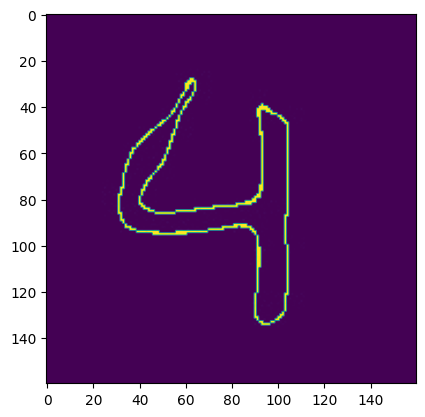

In [185]:
from matplotlib import pyplot as plt
plt.imshow(human_drawing)

In [186]:
def drawing_figure(image,base=None):
    ''' find the drawn contour on the image'''
    image[image<100]=0
    image[image>100]=255
    cnts = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[-2]
    if(base is None):
        draw_img = np.zeros((160,160)).astype(np.uint8)
    else:
        draw_img = base.astype(np.uint8)
    for s in cnts:
        for pt in s:
            draw_img[pt[0][1],pt[0][0]] =255
    return draw_img

In [187]:
search_constellations = drawing_figure(search,constellation)
human_constellations = drawing_figure(human_drawing,constellation)

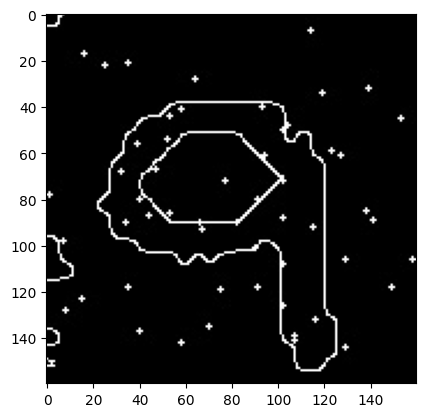

In [188]:
plt.imshow(search_constellations)

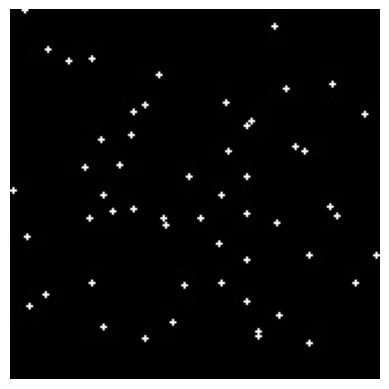

In [189]:
plt.axis(False)
plt.imshow(constellation)

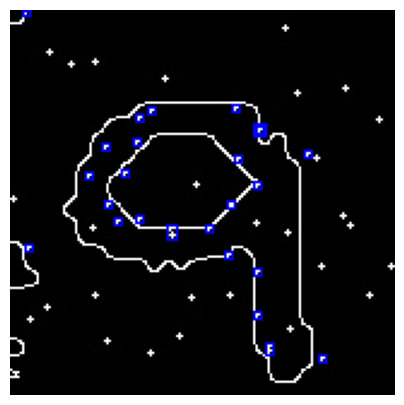

In [190]:
im = search_constellations.copy()
#im = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
for c in search_points:
    rect = cv2.boundingRect(c)
    x,y,w,h = rect
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(5,5))
plt.axis(False)
plt.imshow(im)


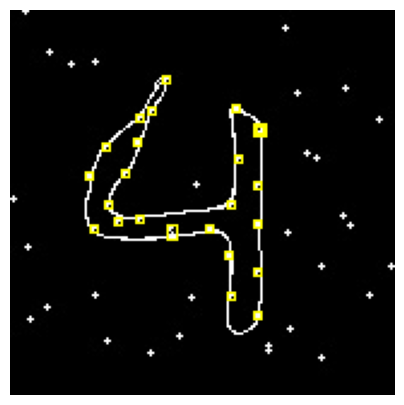

In [191]:
im = human_constellations.copy()
#im = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
for c in human_points:
    rect = cv2.boundingRect(c)
    x,y,w,h = rect
    cv2.rectangle(im,(x,y),(x+w,y+h),(255,255,0),1)
plt.figure(figsize=(5,5))
plt.axis(False)
plt.imshow(im)

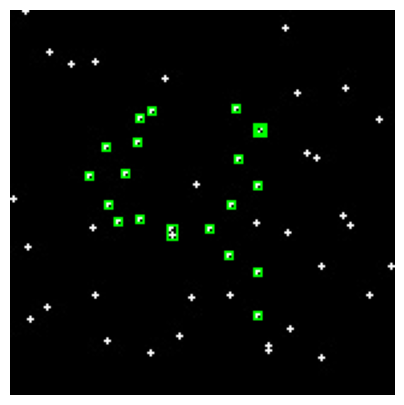

In [192]:
im = constellation.copy()
#im = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
for c in common_points:
    rect = cv2.boundingRect(c)
    x,y,w,h = rect
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)
plt.figure(figsize=(5,5))
plt.axis(False)
plt.imshow(im)

In [193]:
IOUs[-1]

0.8148148148148148

In [194]:
len(search_points)

25

In [172]:
len(human_points)

27

In [173]:
search_points

[array([[[ 87, 153]],
 
        [[ 86, 154]],
 
        [[ 87, 155]],
 
        [[ 88, 154]]], dtype=int32),
 array([[[ 85, 137]],
 
        [[ 84, 138]],
 
        [[ 85, 139]],
 
        [[ 86, 138]]], dtype=int32),
 array([[[ 74, 129]],
 
        [[ 73, 130]],
 
        [[ 74, 131]],
 
        [[ 75, 130]]], dtype=int32),
 array([[[ 91, 120]],
 
        [[ 90, 121]],
 
        [[ 91, 122]],
 
        [[ 92, 121]]], dtype=int32),
 array([[[ 78, 116]],
 
        [[ 77, 117]],
 
        [[ 78, 118]],
 
        [[ 79, 117]]], dtype=int32),
 array([[[ 91, 115]],
 
        [[ 90, 116]],
 
        [[ 91, 117]],
 
        [[ 92, 116]]], dtype=int32),
 array([[[ 13, 113]],
 
        [[ 12, 114]],
 
        [[ 13, 115]],
 
        [[ 14, 114]]], dtype=int32),
 array([[[  4, 113]],
 
        [[  3, 114]],
 
        [[  4, 115]],
 
        [[  5, 114]]], dtype=int32),
 array([[[ 57, 106]],
 
        [[ 56, 107]],
 
        [[ 57, 108]],
 
        [[ 58, 107]]], dtype=int32),
 array([[[ 93, 103]

In [174]:
search_path

'../Search/Final 11/image_11.jpg'

In [175]:
np.mean(IOUs)

0.6040940369136439

In [176]:
common= find_common_dots(dots,dots)

In [177]:
len(dots)+len(dots)-len(common)

68

In [178]:
len(common)/84

0.8095238095238095